# 5. 模型评估

In [ ]:
将数据集划分为训练集和测试集有3种处理方法：
 1、留出法 2、交叉验证法 3、自助法

本次采用【交叉验证法】划分数据集，将数据划分为3部分：训练集、验证集和测试集。
让模型在训练集进行学习，在验证集上进行参数调优，最后使用测试集数据评估模型的性能。

模型调优我们采用【网格搜索调优参数】，通过构建参数候选集合，然后网格搜索穷举各种参数
组合，根据设定评定的评分机制找到最好的那一组设置。



In [ ]:
【GridSearchCV】
其意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。
但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果。
数据量比较大的时候可以使用一个快速调优的方法——坐标下降。
它其实是一种贪心算法：拿当前对模型影响最大的参数调优，直到最优化；
再拿下一个影响最大的参数调优，如此下去，直到所有的参数调整完毕。
这个方法的缺点就是可能会调到局部最优而不是全局最优，但是省时间省力。
sklearn里面的GridSearchCV用于系统地遍历多种参数组合，通过交叉验证确定最佳效果参数。

## 5.1 cross-validation+grid search

In [ ]:
#把数据集分为训练集和测试集，其中 test_size=0.3，即测试集占总数据的 30%
# random_state = 0 每次切分的数据都一样
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# 构建参数组合
#param_grid：值为字典，即需要最优化的参数的取值
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,], 'penalty': [ 'l1', 'l2']} 

In [ ]:
# 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10)   #cv :交叉验证参数，使用十折交叉验证
grid_search.fit(X_train, y_train) # 使用训练集学习算法

In [ ]:
results = pd.DataFrame(grid_search.cv_results_) 
best = np.argmax(results.mean_test_score.values)
print("Best parameters: {}".format(grid_search.best_params_))                     #打印最优参数
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))      #打印最佳验证参数

#Best parameters: {'C': 1000, 'penalty': 'l1'}
#Best cross-validation score: 0.95817

In [ ]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))   #打印测试集准确度分数

#Test set accuracy score: 0.95851

In [ ]:
print(classification_report(y_test, y_pred))

#             precision    recall  f1-score   support

          0       0.94      0.98      0.96     85172
          1       0.98      0.93      0.96     85417

avg / total       0.96      0.96      0.96    170589


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))                     
#打印最优参数
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))       
#打印最佳验证参数

#Best parameters: {'C': 1000, 'penalty': 'l1'}
#Best cross-validation score: 0.95817

对混淆矩阵可视化

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)

In [ ]:
#在测试数据集中召回度量
print("Recall metric in the testing dataset: ", 
      cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.9323202641160425


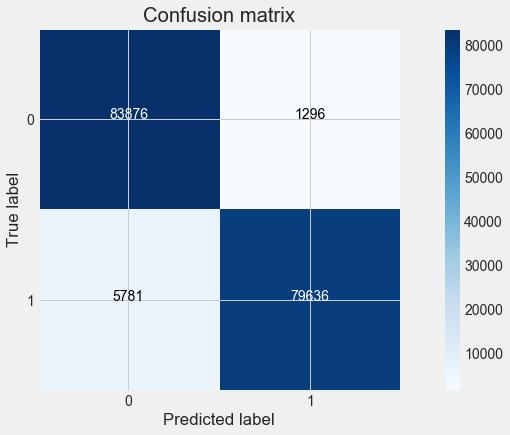

In [70]:
# Plot non-normalized confusion matrix           绘制非归一化混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## 5.2 模型评估

In [ ]:
解决不同的问题，通常需要不同的指标来度量模型的性能。
尽可能提高模型的查全率（recall）比提高查准率（precision）更为重要。

Recall metric in the testing dataset:  0.982532751091703
Recall metric in the testing dataset:  0.9675006146317477
Recall metric in the testing dataset:  0.952714330870904
Recall metric in the testing dataset:  0.9418031539389115
Recall metric in the testing dataset:  0.9323202641160425
Recall metric in the testing dataset:  0.9260451666530082
Recall metric in the testing dataset:  0.9195242164908625
Recall metric in the testing dataset:  0.9116920519334558
Recall metric in the testing dataset:  0.8990950279218423


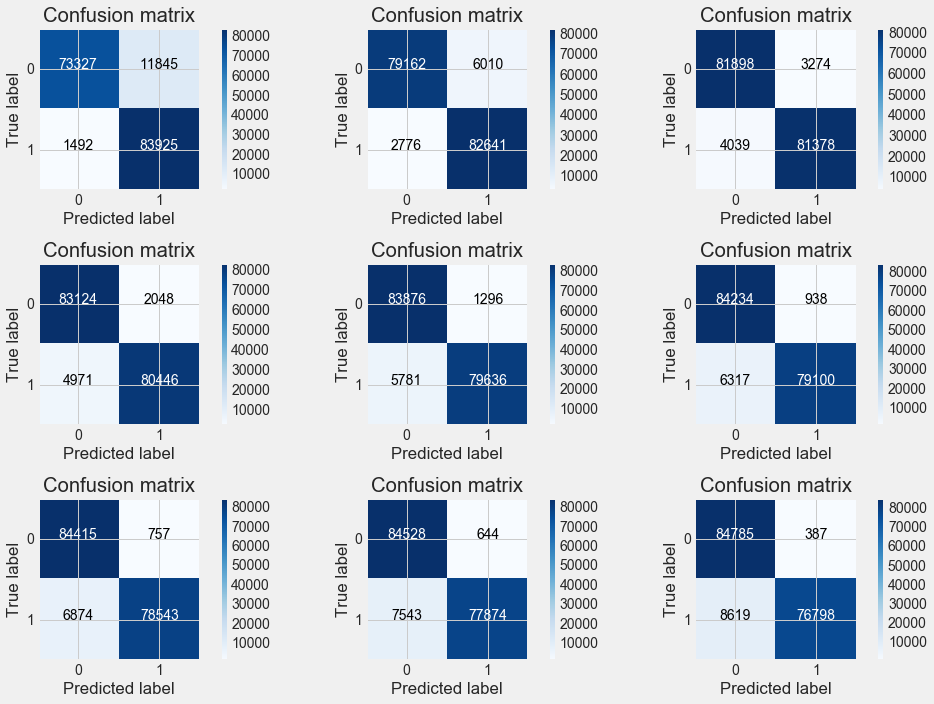

In [72]:
y_pred_proba = grid_search.predict_proba(X_test)  #predict_prob 获得一个概率值

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix             # 生成混淆矩阵 
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)   
    np.set_printoptions(precision=2)

    #在测试数据集中召回度量
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix      绘制非归一化混淆矩阵
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names)

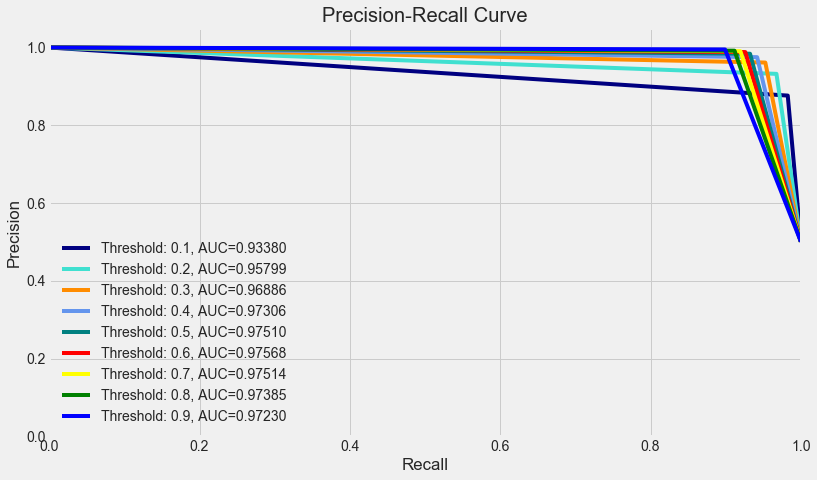

In [73]:
from itertools import cycle

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]     # 设定不同阈值
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #预测出来的概率值是否大于阈值  

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')                       #横坐标：Recall
    plt.ylabel('Precision')                    #纵坐标：Precision
    plt.ylim([0.0, 1.05])                      #y轴上下限设定范围[0.0, 1.05]
    plt.xlim([0.0, 1.0])                       #y轴上下限设定范围[0.0, 1.0]
    plt.title('Precision-Recall Curve')        #标题：Precision-Recall Curve
    plt.legend(loc="lower left")               

## 5.3 最优阈值

In [ ]:
precision和recall是一组矛盾的变量。
从混淆矩阵和PRC曲线可以看到，阈值越小，recall值越大，模型能找出信用卡被盗刷的数量也就更多，但是误判的数量也较大。
随着阈值的提高，recall值逐渐降低，precision值也逐渐提高，误判的数量也随之减少。
通过调整模型阈值，控制模型反信用卡欺诈的力度，若想找出更多的信用卡被盗刷就设置较小的阈值，反之，则设置较大的阈值。
实际业务中，阈值的选择取决于公司业务边际利润和边际成本的比较；
当模型阈值设置较小的值，确实能找出更多的信用卡被盗刷的持卡人，但随着误判数量增加，不仅加大了贷后团队的工作量，
也会降低误判为信用卡被盗刷客户的消费体验，从而导致客户满意度下降，如果某个模型阈值能让业务的边际利润和边际成本达到平衡时，
则该模型的阈值为最优值
当然也有例外的情况，发生金融危机，往往伴随着贷款违约或信用卡被盗刷的几率会增大，而金融机构会更愿意不惜一切代价守住风险的底线。